In [55]:
import pandas as pd
import glob
import os
import yaml
import matplotlib.pyplot as plt

Reading traj files with pd.read_csv

In [9]:
#df = pd.read_csv("SEIR_P_M/init_trials/1/SEIR_p_m_d14_r10_1-1751907615839.traj", sep='\t')
#df

In [6]:
with open('/Users/MiladM-Dev/Documents/1PhD/project-sim-ai/config-files/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Find all .traj files
traj_files = glob.glob(os.path.join(config["FilePath"]["outputFilePath"], "*.traj"))


results = []
for file in traj_files:
    df = pd.read_csv(file, sep='\t')
    results.append({
        "Days": df['t'].max(),
        "File": os.path.basename(file).replace('.traj', '')
    })
Time_df = pd.DataFrame(results).sort_values(by='Days', ascending=True)


plt.figure(figsize=(12, 6))
plt.bar(Time_df['File'], Time_df['Days'], color='skyblue')
plt.xlabel('File Name')
plt.ylabel('Days')
plt.title('Days from Trajectory Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save plot
plot_filename = config["FilePath"]["outputFilePath"]+"Bar_timeseries_plot.png"
plt.savefig(plot_filename, dpi=300)
plt.close()


# Save the DataFrame to a CSV file
#Time_df.to_csv(os.path.join(config["outputFilePath"], "time_df.csv"), index
plt.figure(figsize=(12, 6))
plt.hist(Time_df['Days'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Days from Trajectory Files')
plt.tight_layout()

plot_filename = config["FilePath"]["outputFilePath"]+"Hist_timeseries_plot.png"
plt.savefig(plot_filename, dpi=300)
plt.close()


In [7]:
plt.figure(figsize=(12, 6))
plt.bar(Time_df['File'], Time_df['Days'], color='skyblue')
plt.xlabel('File Name')
plt.ylabel('Days')
plt.title('Days from Trajectory Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save plot
plot_filename = config["FilePath"]["outputFilePath"]+"Bar_timeseries_plot.png"
plt.savefig(plot_filename, dpi=300)
plt.close()

Extracting the filename prefix and seed from each entry in the `"^(.*?)-(\d+)\.trees$"`.

In [14]:
import re

filename = "SEID-S10k-inf0.0001-1756121306600.full_collapsed"
match = re.match(r"^(.*?)-(\d+)\.full_collapsed$", filename)

if match:
    name = match.group(1)  # SEID-S10k-inf0.0001
    seed = match.group(2)  # 1756121306600
    print("Name:", name)
    print("Seed:", seed)


Name: SEID-S10k-inf0.0001
Seed: 1756121306600


In [ ]:
with open('/Users/MiladM-Dev/Documents/1PhD/project-sim-ai/config-files/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Find all .traj files
traj_files = glob.glob(os.path.join(config["FilePath"]["outputFilePath"], "*.traj"))


results = []
for file in traj_files:
    df = pd.read_csv(file, sep='\t')
    results.append({
        "Days": df['t'].max(),
        "File": os.path.basename(file).replace('.traj', '')
    })
Time_df = pd.DataFrame(results).sort_values(by='Days', ascending=True)

Time_df[['name', 'seed']] = Time_df['File'].str.extract(r'^(.*?)-(\d+)$')

Time_df = Time_df[['File', 'name', 'seed', 'Days' ]]
Time_df

,File,name,seed,Days
156,SEIDpm-S10k-inf0.0001-Oinf0.0001-M1_5-17562317...,SEIDpm-S10k-inf0.0001-Oinf0.0001-M1_5,1756231792941,0.718892
181,SEIDpm-S10k-inf0.0001-Oinf0.1-M1_2-1756233075737,SEIDpm-S10k-inf0.0001-Oinf0.1-M1_2,1756233075737,104.297515
345,SEIDpm-S10k-inf0.0001-Oinf0.01-M1_3-1756214043729,SEIDpm-S10k-inf0.0001-Oinf0.01-M1_3,1756214043729,106.007017
85,SEIDpm-S10k-inf0.0001-Oinf0.1-M1_2-1756213634385,SEIDpm-S10k-inf0.0001-Oinf0.1-M1_2,1756213634385,106.610945
212,SEIDpm-S10k-inf0.0001-Oinf0.1-M1_2-1756216790056,SEIDpm-S10k-inf0.0001-Oinf0.1-M1_2,1756216790056,109.125688
...,...,...,...,...
148,SEIDpm-S10k-inf0.0001-Oinf0.01-M0.0001_23-1756...,SEIDpm-S10k-inf0.0001-Oinf0.01-M0.0001_23,1756213751206,123172.769076
496,SEIDpm-S10k-inf0.0001-Oinf0.01-M0.0001_23-1756...,SEIDpm-S10k-inf0.0001-Oinf0.01-M0.0001_23,1756218052094,123688.775066
363,SEIDpm-S10k-inf0.0001-Oinf0.0001-M0.0001_25-17...,SEIDpm-S10k-inf0.0001-Oinf0.0001-M0.0001_25,1756238312252,140425.402274
163,SEIDpm-S10k-inf0.0001-Oinf0.0001-M0.0001_25-17...,SEIDpm-S10k-inf0.0001-Oinf0.0001-M0.0001_25,1756218571942,149780.547141


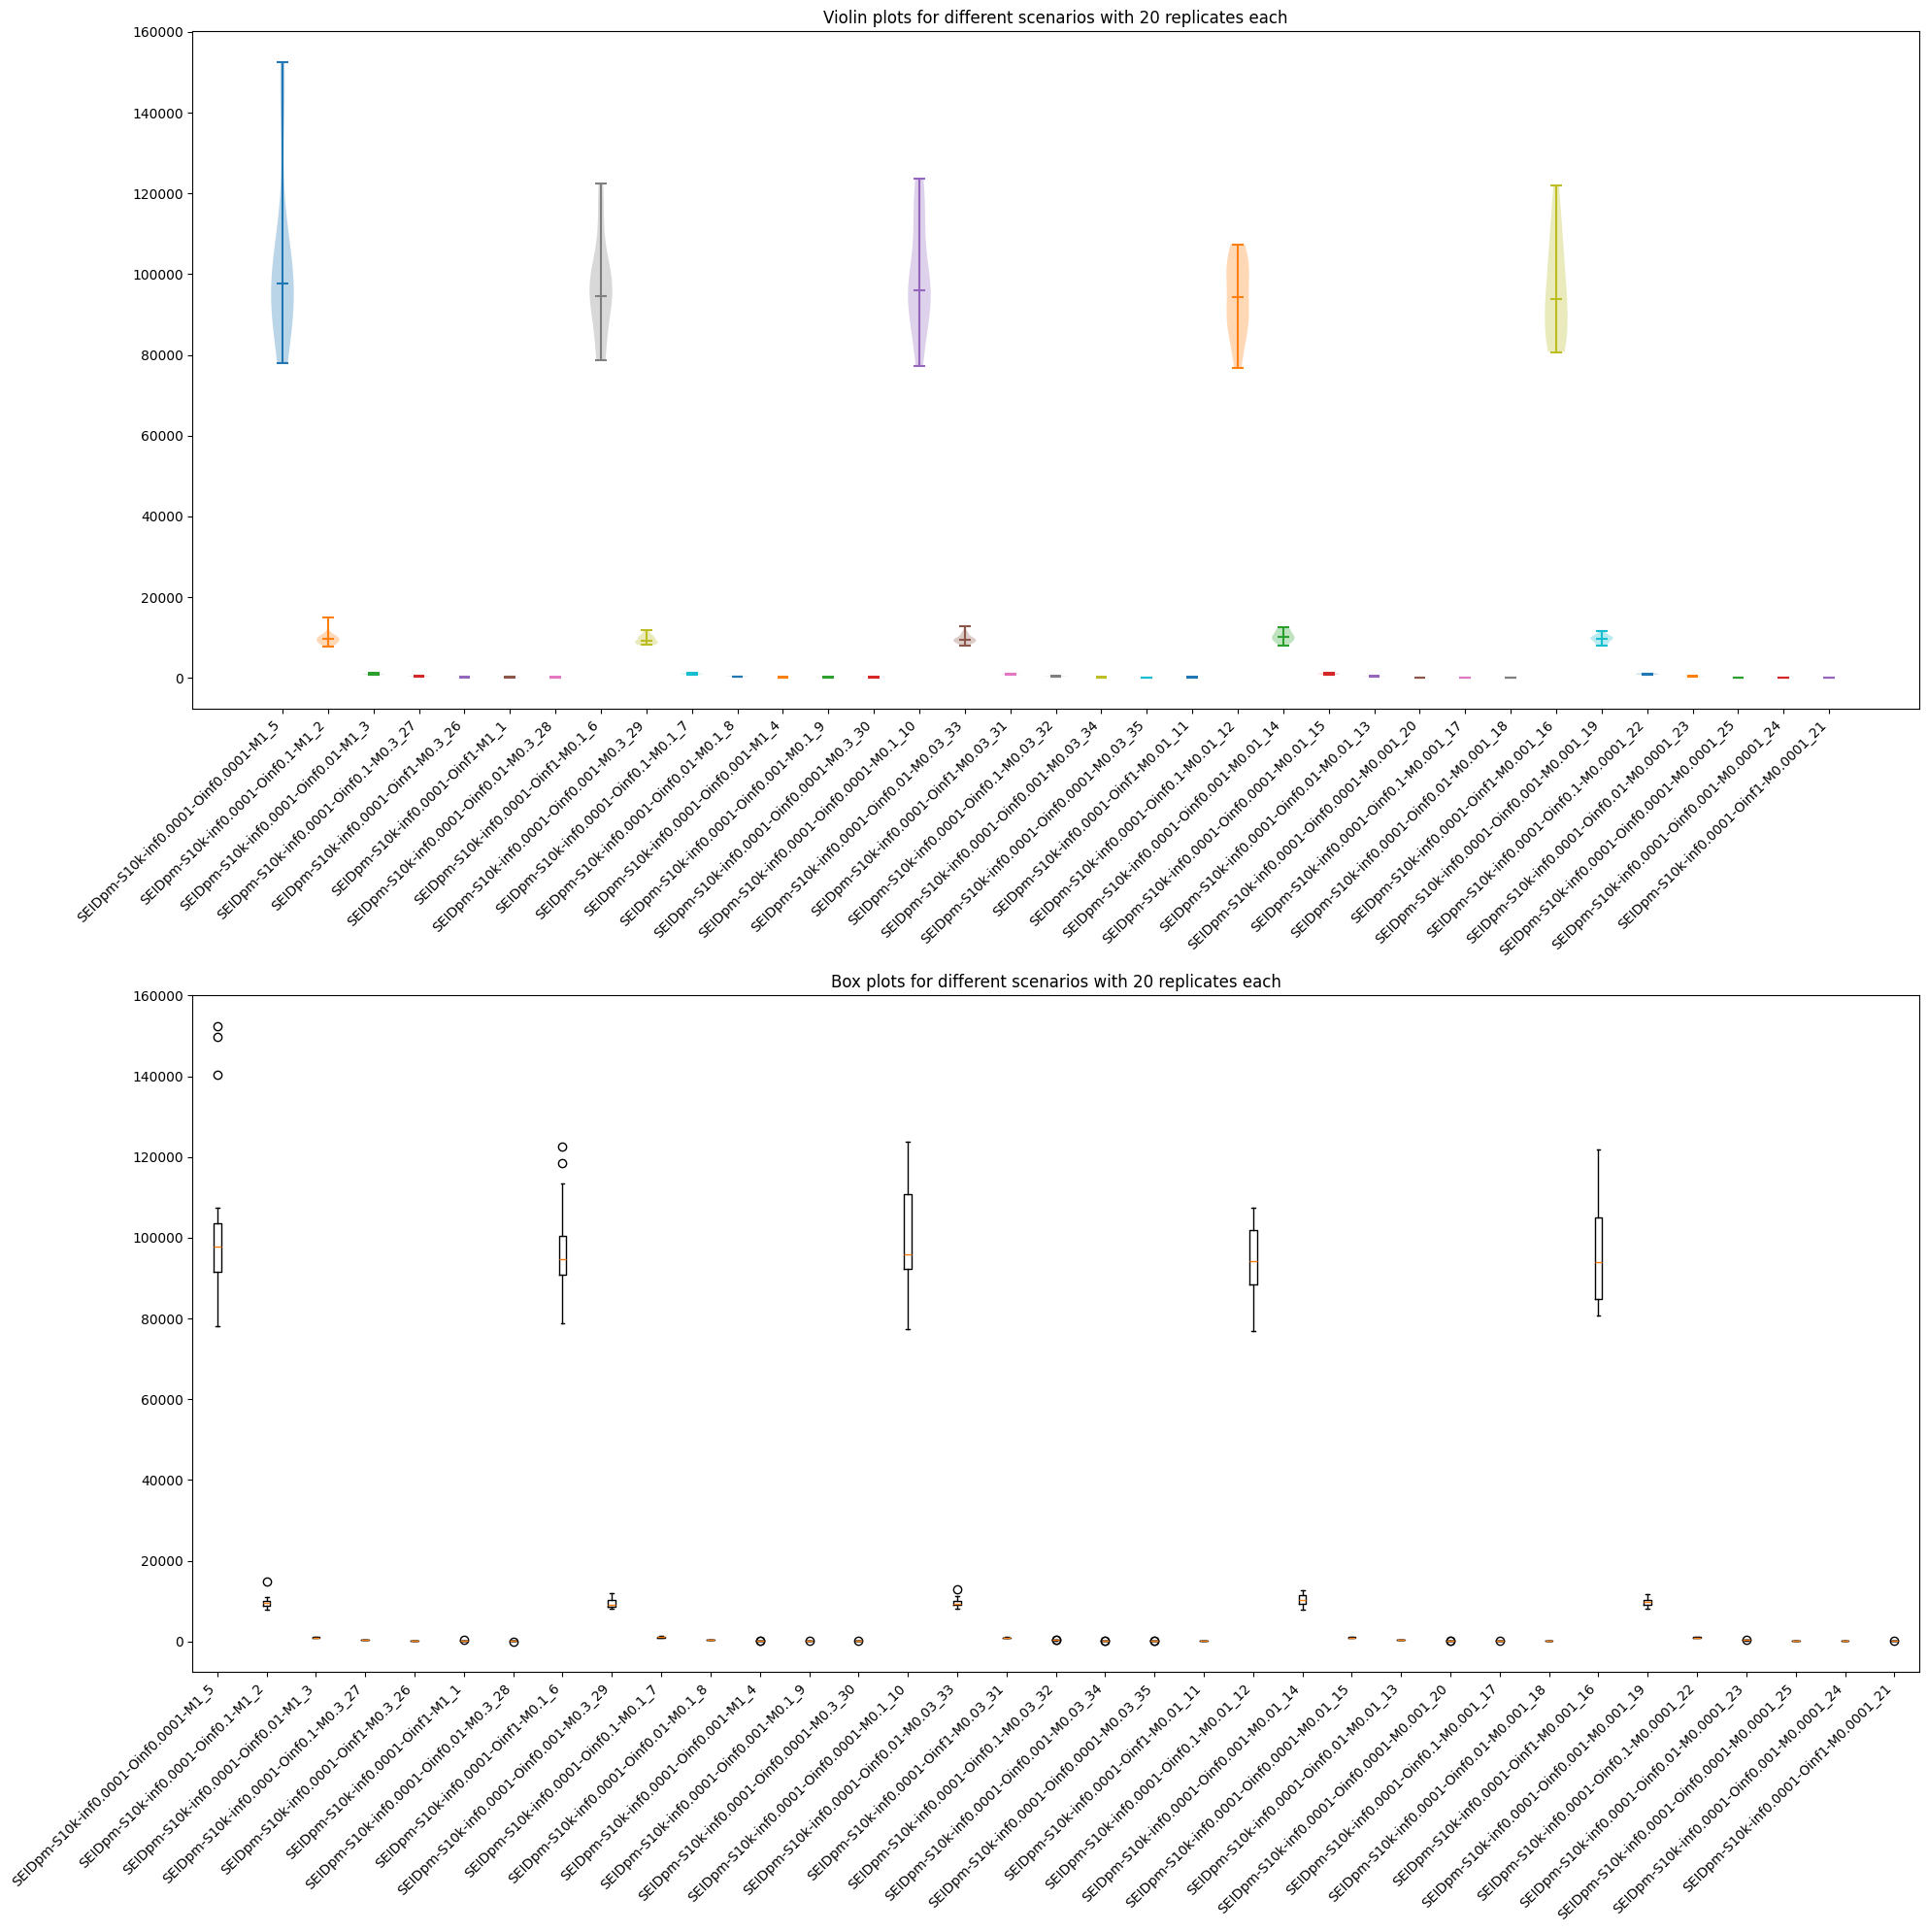

In [54]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Collect unique names
names = Time_df["name"].unique()

for i, (name, group) in enumerate(Time_df.groupby("name")):
    # Violin plot of all Days across all seeds for this name
    axs[0].violinplot(
        dataset=group["Days"].dropna(),
        positions=[i],
        showmeans=False,
        showmedians=True
    )

    # Box plot of all Days across all seeds for this name
    axs[1].boxplot(
        x=group["Days"].dropna(),
        positions=[i]
    )

# Label x-axis with names
axs[0].set_xticks(range(len(names)))
axs[0].set_xticklabels(names, rotation=45, ha="right")

axs[1].set_xticks(range(len(names)))
axs[1].set_xticklabels(names, rotation=45, ha="right")

axs[0].set_title("Violin plots for different scenarios with 20 replicates each")
axs[1].set_title("Box plots for different scenarios with 20 replicates each")

plt.tight_layout()
plt.show()


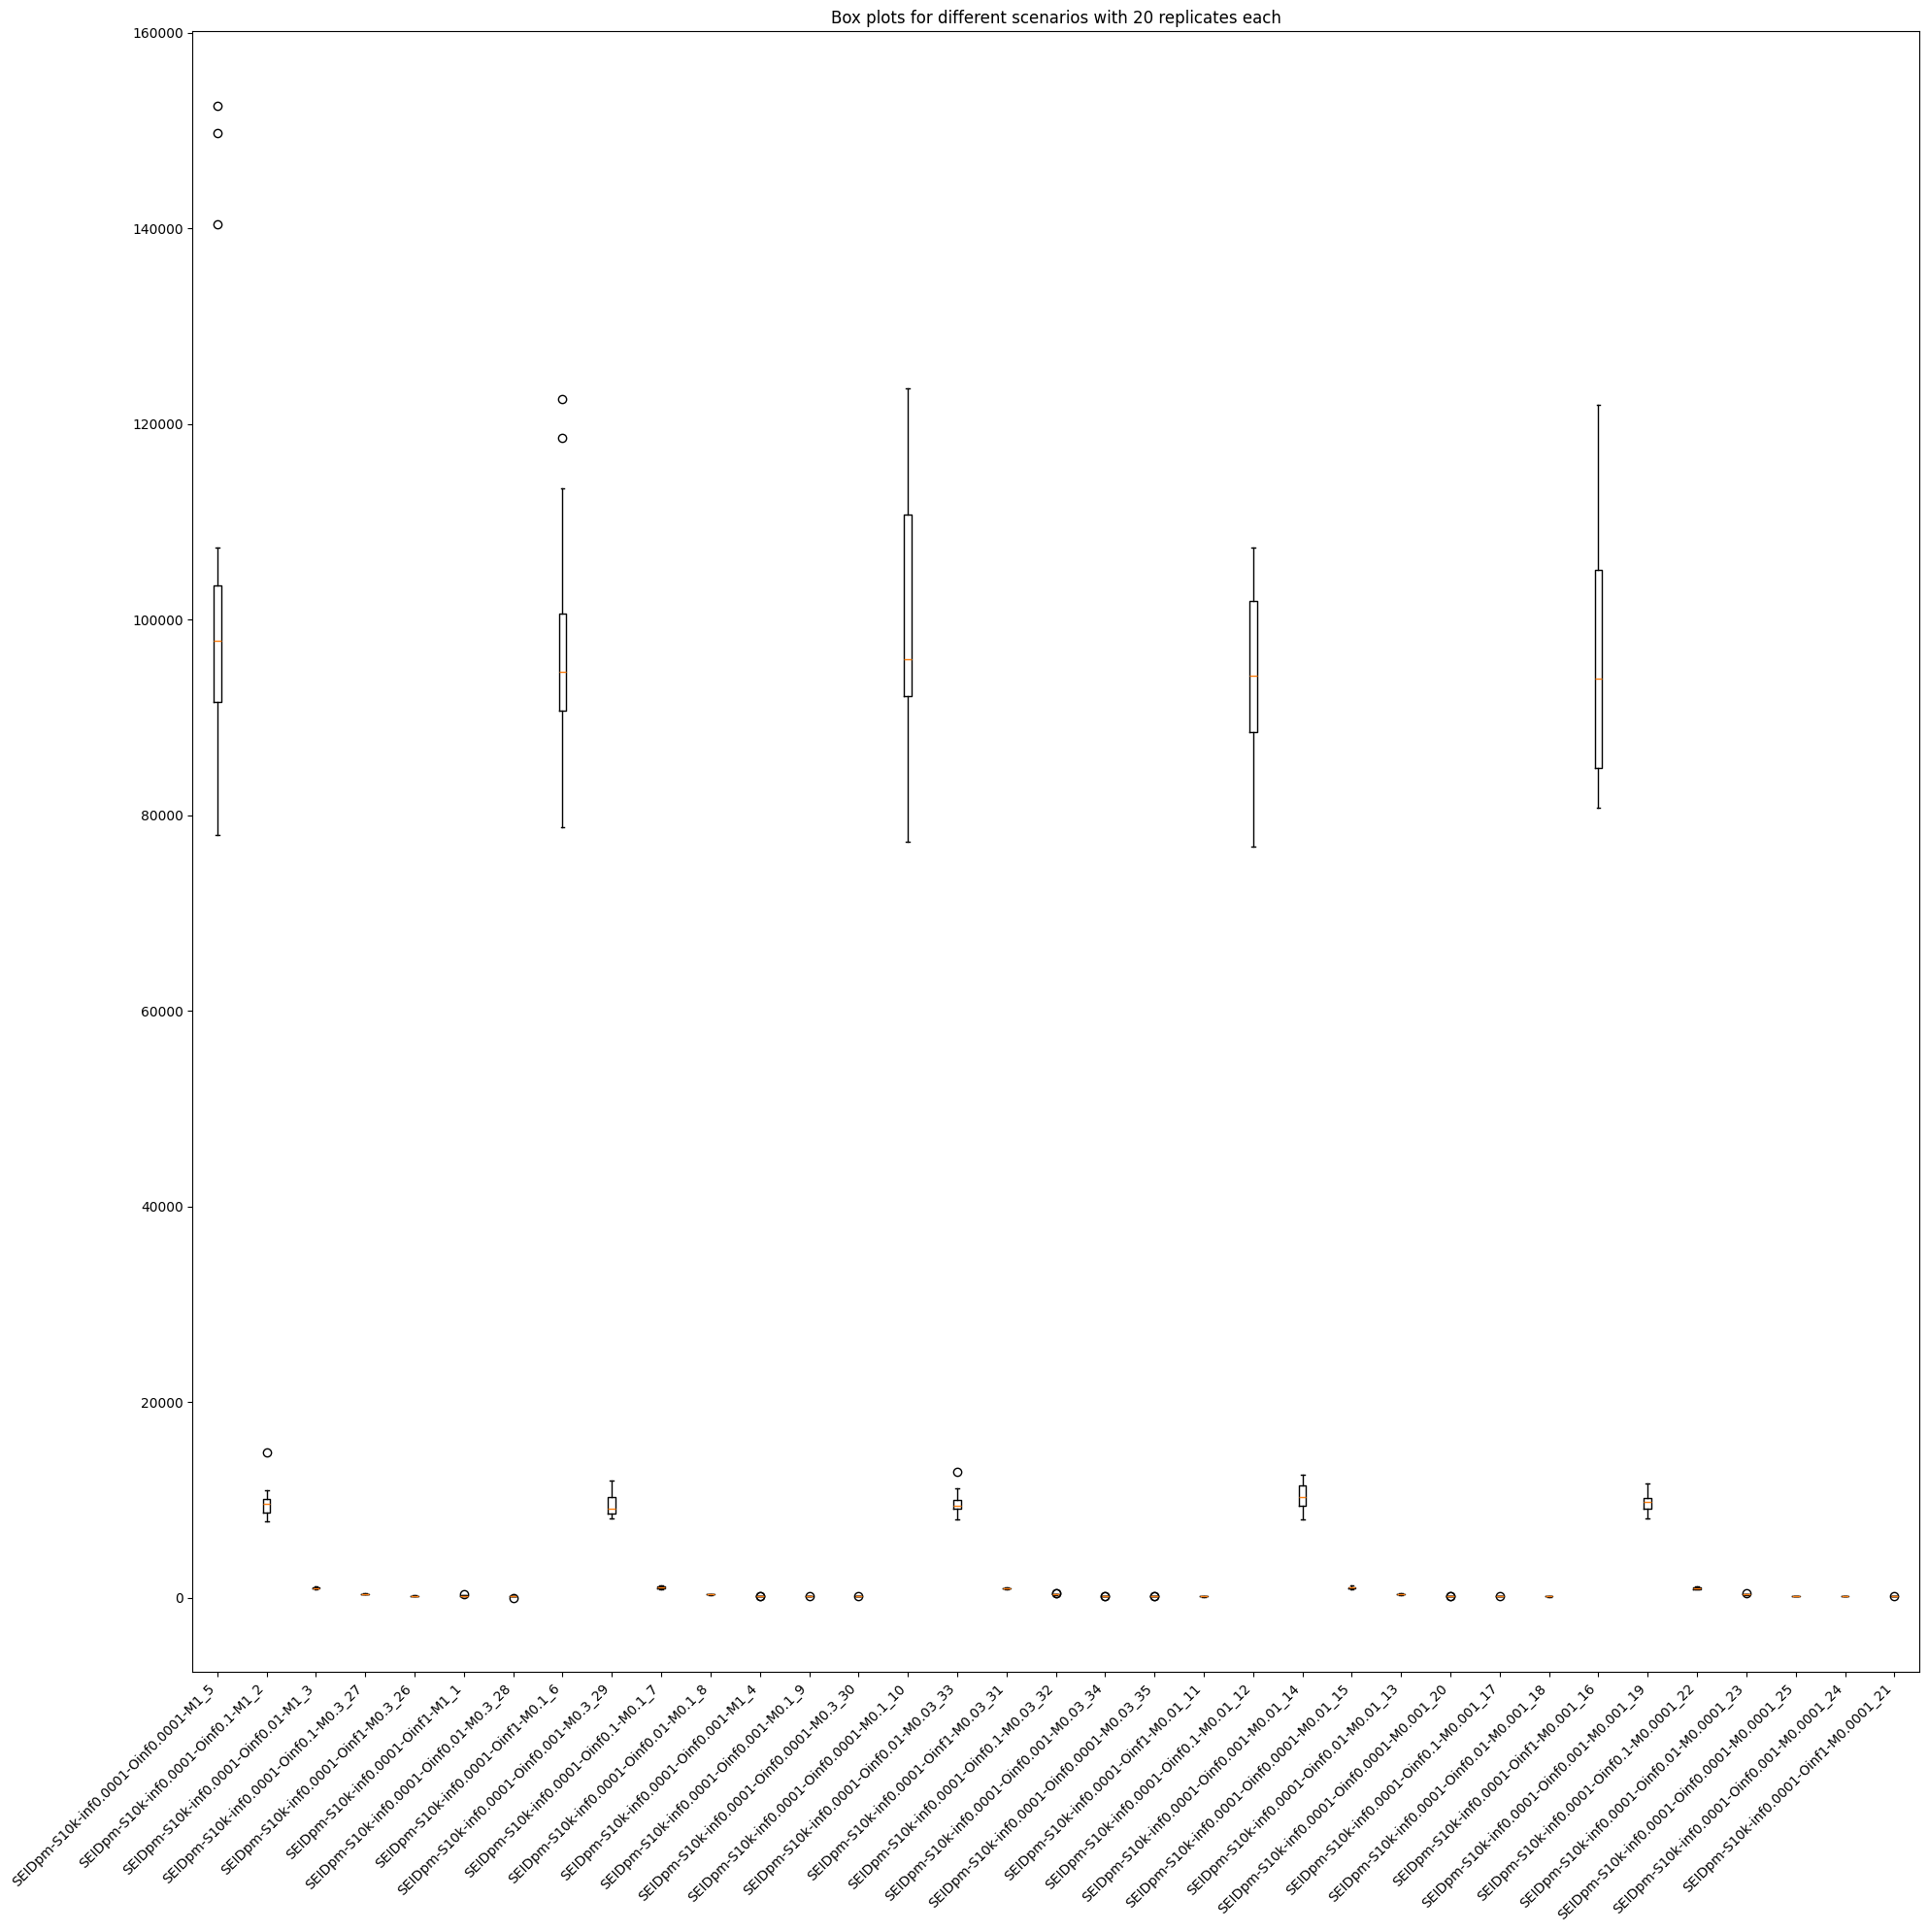

In [ ]:
fig, axs = plt.subplots(figsize=(20, 20))

# Collect unique names
names = Time_df["name"].unique()

for i, (name, group) in enumerate(Time_df.groupby("name")):
    # Box plot of all Days across all seeds for this name
    axs.boxplot(
        x=group["Days"].dropna(),
        positions=[i]
    )

# Label x-axis with names

axs.set_xticks(range(len(names)))
axs.set_xticklabels(names, rotation=45, ha="right")

axs.set_title("Box plots for different scenarios with 20 replicates each")

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(
    config["FilePath"]["outputFilePath"], "Box_Time_Distribution.png"))